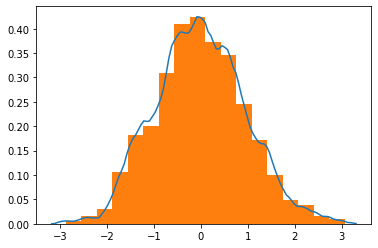

In [21]:
#this function returns the optimal number of histogram bins to display the input data
def numBins(data):
    from statistics import stdev
    STD = stdev(data)
    LEN = len(data)
    RNG = max(data)-min(data)
    B =  (24*np.sqrt(np.pi))**(1/3) * STD * LEN**(-1/3)
    M = round(RNG/B)
    return M

def kernel(u):
    return (3/4)*(1-u**2) if -1 <= u <= 1 else 0

def F(data,h,t):
    return (1/(len(data)*h))*sum([kernel((t-x)/h) for x in data])

#this function returns a curve that fits your data 
#it is not a regression, it simply maps the outline of a histogram
def kernelFit(data):
    from numpy import arange
    from statistics import stdev
    
    MIN = min(data)
    MAX = max(data)
    STD = stdev(data)
    h = 1.06*STD*(len(data)**(-1/5))
    RNG = MAX-MIN
    curve = [[t,F(data,h,t)] for t in arange(MIN-0.05*RNG, MAX+0.05*RNG, RNG/100)]
    return list(zip(*curve))

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt

    testData = np.random.default_rng().normal(0, 1, 1000)

    fitX, fitY = kernelFit(testData)
    plt.plot(fitX,fitY)

    plt.hist(testData,bins=numBins(testData),density=True)
    plt.show()

In [13]:
def emd(P,Q):
    assert len(P) == len(Q)
    EMD = [0]
    for i in range(len(P)):
        EMD.append(P[i]-Q[i]+EMD[-1])
    return sum([abs(d) for d in EMD])

def prepareForEmd(D1,D2):
    

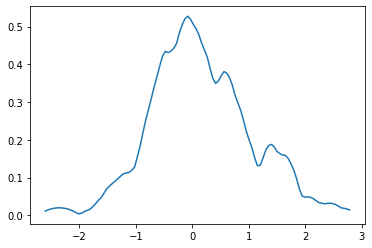

In [24]:
#first i want a simple model of evolution to compare to

from numpy.random import default_rng
import matplotlib.pyplot as plt


popSize = 100
traitStartAve = 0
traitStartStd = 1
population = default_rng().normal(traitStartAve, traitStartStd, popSize)


fitX, fitY = kernelFit(population)
plt.plot(fitX,fitY)
plt.show()

In [25]:
popLog = [population]
mutationAve = 0
mutationStd = 0.5

for gen in range(100):
    mutations = default_rng().normal(mutationAve, mutationStd, popSize)
    population = [org + mutation for org,mutation in zip(population,mutations)]
    popLog.append(population)

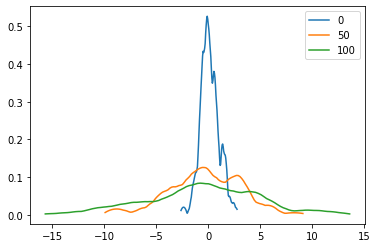

In [26]:
for num,entry in enumerate(popLog):
    if num not in [0,len(popLog)//2,len(popLog)-1]: continue
    fitX, fitY = kernelFit(entry)
    plt.plot(fitX,fitY,label = num)
plt.legend()
plt.show()